<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Equation

In [ ]:
np.random.seed(1)

X = np.arange(0, 3).reshape((3, 1))
y = 4 + 3 * X + np.random.randn(3, 1)

X.shape, y.shape

((3, 1), (3, 1))

In [ ]:
print(X)
print(y)

[[0]
 [1]
 [2]]
[[5.62434536]
 [6.38824359]
 [9.47182825]]


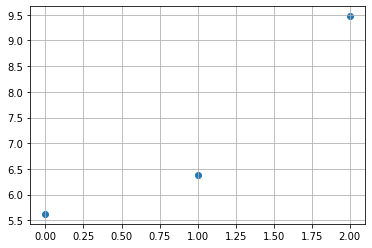

In [ ]:
plt.scatter(X, y)
plt.grid()

In [ ]:
X_b = np.c_[np.ones(shape=(3, 1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [ ]:
# MSE를 최소화하는 [b0, b1]을 찾는 게 선형 회귀의 목적.
# [b0, b1]을 찾는 방법 1: 정규 방정식(normal equation)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best  #> [[y절편], [기울기]]

array([[5.23773096],
       [1.92374144]])

In [ ]:
y_pred = X_b @ theta_best
y_pred

array([[5.23773096],
       [7.1614724 ],
       [9.08521384]])

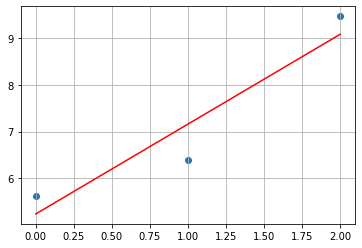

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)  
# fit: 선형 회귀 방정식의 절편(intercept)과 기울기(coefficient)들을 찾는 과정.
lin_reg.intercept_, lin_reg.coef_

(array([5.23773096]), array([[1.92374144]]))

In [ ]:
y_pred = lin_reg.predict(X)
y_pred

array([[5.23773096],
       [7.1614724 ],
       [9.08521384]])

# Gradient Descent(경사 하강법)

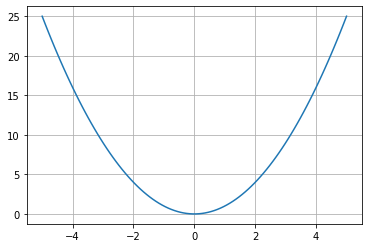

In [ ]:
X = np.linspace(start=-5, stop=5, num=100)
y = X ** 2

plt.plot(X, y, '-')
plt.grid()

## 기울기

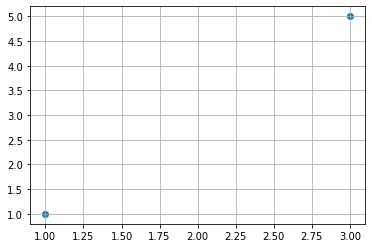

In [ ]:
# 기울기: (y의 증가분) / (x의 증가분)
pt1 = [1, 1]
pt2 = [3, 5]

plt.scatter([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.grid()

In [ ]:
delta_y = pt2[1] - pt1[1]  # y 증가(감소)분
delta_x = pt2[0] - pt1[0]  # x 증가(감소)분
slope = delta_y  / delta_x
slope

2.0

In [ ]:
def gradient(fn, x, h=0.001):
    return (fn(x + h) - fn(x)) / h

In [ ]:
def square(x):
    return x**2

In [ ]:
# y = x**2 그래프에서 x=4에서의 접선의 기울기(gradient)
gradient(fn=square, x=4)

8.0010000000037

In [ ]:
gradient(fn=square, x=2), gradient(fn=square, x=0)

(4.000999999999699, 0.001)

In [ ]:
gradient(fn=square, x=-2)

-3.9989999999994197

## 경사 하강법
1. 임의의 점(`x_init`)을 선택
2. 그 점에서의 grdient(기울기)를 계산
3. 선택한 임의의 점을 이동: `x_new = x_init - eta * gradient`
4. 2 ~ 3의 과정을 반복.
* eta: 양수(eta > 0). 학습률(learning rate). eta가 크면 최솟값으로 빨리 수렴, 작으면 느리게 수렴.

In [ ]:
def plot_function(fn):
    X = np.linspace(start=-5, stop=5, num=100)
    y = fn(X)
    plt.plot(X, y, '-')

In [ ]:
 def plot_gradient_descent(fn, x_init, n_iterations=5, eta=0.1):
    plot_function(fn)  # y = x ** 2

    # x_init = -4
    y_init = fn(x_init)
    plt.scatter(x_init, y_init, label='0', color='red')

    # eta = 0.1
    for epoch in range(n_iterations):
        x_new = x_init - eta * gradient(fn, x=x_init)
        y_new = fn(x_new)
        plt.scatter(x_new, y_new, label=f'{epoch+1}')
        x_init = x_new

    plt.grid()
    plt.legend()

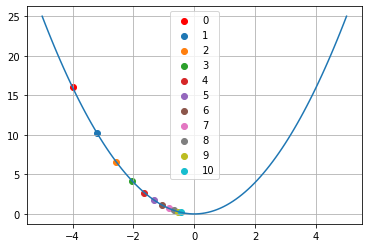

In [ ]:
plot_gradient_descent(fn=square, x_init=-4, n_iterations=10)

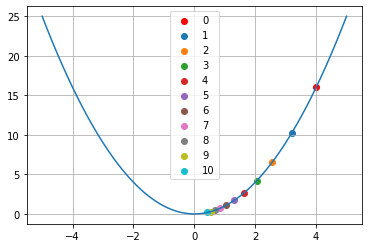

In [ ]:
plot_gradient_descent(fn=square, x_init=4, n_iterations=10)

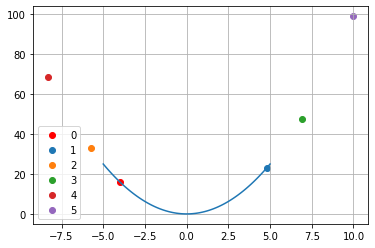

In [ ]:
plot_gradient_descent(fn=square, x_init=-4, n_iterations=5, eta=1.1)

# 경사하강법을 사용한 선형 회귀 방정식의 절편, 기울기 찾기: 
* 선형 회귀 방정식: `y = b0 + b1 * x`
* 절편(intercept, bias 편향): `b0`
* 기울기(coefficient): `b1`

In [ ]:
 np.random.seed(1)

 X = np.arange(0, 3).reshape((3, 1))
 y = 4 + 3 * X + np.random.randn(3, 1)

In [ ]:
X

array([[0],
       [1],
       [2]])

In [ ]:
y

array([[5.62434536],
       [6.38824359],
       [9.47182825]])

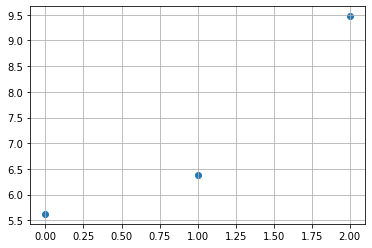

In [ ]:
plt.scatter(X, y)
plt.grid()

In [ ]:
X_b = np.c_[np.ones(shape=(3, 1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [ ]:
eta = 0.1  # 학습률(learning rate)
m = 3  # 샘플 개수
n_iterations = 1000  # 반복 횟수

np.random.seed(1)
theta = np.random.randn(2, 1)  # [[b0], [b1]] 초깃값 - 난수 사용
print(theta)

for epoch in range(n_iterations):
    gradient = (2/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradient

print(theta)

[[ 1.62434536]
 [-0.61175641]]
[[5.23773096]
 [1.92374144]]


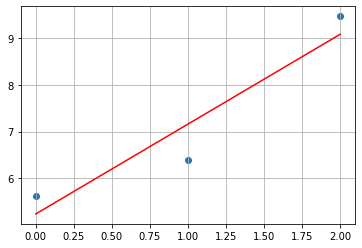

In [ ]:
y_pred = X_b @ theta

plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()

In [2]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(eta0=0.1)
sgd_reg.fit(X, y.ravel())
# fit: MSE를 최소화하는 절편 b0와 계수 b1을 찾음.

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_
# predict: y = intercept_ + coef_ * x

(array([4.94745821]), array([2.1425144]))

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [ ]:
np.random.seed(1)

m = 100  # 샘플 개수
X = 2 * np.random.rand(m, 1)  # (m, 1) shape의 2d array
y = 4 + 3 * X + np.random.randn(m, 1)

X.shape, y.shape

((100, 1), (100, 1))

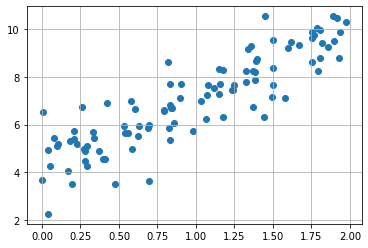

In [ ]:
plt.scatter(X, y)
plt.grid()

In [ ]:
X_b = np.c_[np.ones(shape=(m, 1)), X]  # bias가 추가된 샘플 행렬
theta = np.random.randn(2, 1)  # 선형 회귀 방정식의 계수들 초깃값 - 난수 사용.
print(theta)

eta = 0.01  # 학습률
n_iterations = 50  # 전체 반복 횟수(모든 샘플에서 gradient가 갱신되는 횟수)
for epoch in range(n_iterations):
    for i in range(m):  # 샘플 개수만큼 반복
        random_index = np.random.randint(m)  # 0 ~ m 사이의 정수 중 난수 선택.
        xi = X_b[random_index:random_index + 1]  # [[1, x]]: gradient를 계산할 샘플 1개
        yi = y[random_index:random_index + 1]  #[[y]]: random_index에 있는 레이블
        gradient = 2 * xi.T @ (xi @ theta - yi)  # gradient 계산
        theta = theta - eta * gradient  # theta 업데이트

print(theta)

[[-1.65460759]
 [-0.37478046]]
[[4.25047888]
 [2.84807561]]


In [ ]:
X_new = np.array([[1, 0],
                  [1, 2]])
y_pred = X_new @ theta
y_pred

array([[4.25047888],
       [9.94663009]])

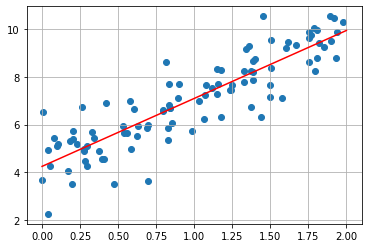

In [ ]:
plt.scatter(X, y)
plt.plot([[0], [2]], y_pred, 'r-')
plt.grid()

In [ ]:
sgd_reg = SGDRegressor(eta0=0.01, max_iter=50)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88008852]), array([3.15152992]))

In [3]:
# GD를 테스트하기 위한 가상의 데이터
np.random.seed(1)

m = 100  # 샘플 개수
X = 2 * np.random.rand(m, 1)  # (m, 1) shape의 2d array
y = 4 + 3 * X + np.random.randn(m, 1)

X.shape, y.shape

((100, 1), (100, 1))

In [6]:
# 함수 정의: batch, stochastic, mini-batch GD
# y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + ... 
# 선형회귀 방정식으로 예측한 값들의 MSE가 최소가 되는 (b0, b1, b2, b3, ...)을 찾는 게 목적.
def gradinet_descent(X, y,
                     max_iterations=1_000,
                     minibatch_size=20,
                     eta0=0.01,
                     random_state=1):
    """X: sample 데이터, y: 레이블,
    max_iterations: 에포크(epoch) 횟수,
    minibatch_size: 미니 배치 크기(minibatch_size=1: stochastic GD, minibatch_size=샘플개수: batch GD),
    eta0: 학습률(learning rate) 초깃값,
    """
    m, n = X.shape  # m: 샘플 개수, n: 샘플의 특성들의 개수
    X_b = np.c_[np.ones(shape=(m, 1)), X]  # 모든 값이 1인 열벡터를 합침 ==> X_b @ theta
    theta_paths = []  # theta들이 수렴해 나가는 것을 확인하기 위해서, 중간 과정을 저장.

    np.random.seed(random_state)  # 난수 seed 설정.
    theta = np.random.randn(n+1, 1)  # 랜덤 초기화
    theta_paths.append(theta)  # 리스트에 theta 초깃값 저장.

    for epoch in range(max_iterations):
        # 훈련 셋을 임의의 섞음. 훈련 셋이 섞인 순서대로 레이블로 섞음.
        shuffled_indices = np.random.permutation(m)  # 0 ~ m(샘플 개수) 사이의 정수를 임의로 섞음.
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):  # m: 샘플 개수
            # 미니 배치 샘플/레이블 선택
            xi = X_b_shuffled[i:(i + minibatch_size)]
            yi = y_shuffled[i:(i + minibatch_size)]
            # 미니 배치에서 gradient 계산
            gradient = (2/minibatch_size) * xi.T @ (xi @ theta - yi)
            # 계산된 gradient로 theta를 업그레이드(갱신)
            theta = theta - eta0 * gradient
            # 갱신된 theta를 저장
            theta_paths.append(theta)

    return np.array(theta_paths)

In [18]:
# batch GD
thetas_batch = gradinet_descent(X, y, minibatch_size=m, eta0=0.1)  # m = 100
# theta 최적값
thetas_batch[-1]

array([[4.23695725],
       [2.84246254]])

In [19]:
# stochastic GD
thetas_stochastic = gradinet_descent(X, y, minibatch_size=1, eta0=0.1)
thetas_stochastic[-1]

array([[4.37511229],
       [2.93391621]])

In [20]:
# mini-batch GD
thetas_minibatch = gradinet_descent(X, y, minibatch_size=20, eta0=0.1)
thetas_minibatch[-1]

array([[4.22266408],
       [2.82749625]])

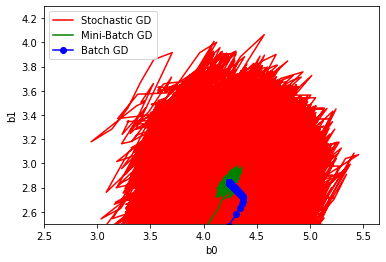

In [28]:
plt.plot(thetas_stochastic[:, 0], thetas_stochastic[:, 1], 'r-', label='Stochastic GD')
plt.plot(thetas_minibatch[:, 0], thetas_minibatch[:, 1], 'g-', label='Mini-Batch GD')
plt.plot(thetas_batch[:, 0], thetas_batch[:, 1], 'bo-', label='Batch GD')
plt.legend()
plt.xlabel('b0')
plt.ylabel('b1')
plt.axis(xmin=2.5, ymin=2.5)
plt.show()

## 다항 회귀(Polynomial Regression)

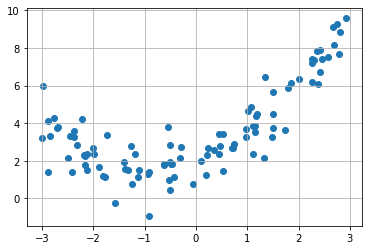

In [31]:
np.random.seed(1)

m = 100
X = 6 * np.random.rand(m, 1) - 3  # -3 <= X < 3인 난수 (100, 1) shape
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.grid()

In [33]:
# 2차항 특성(feature)를 추가
X_poly = np.c_[X, X**2]
X_poly[:5]

array([[-0.49786797,  0.24787252],
       [ 1.32194696,  1.74754377],
       [-2.99931375,  8.99588298],
       [-1.18600456,  1.40660683],
       [-2.11946466,  4.49213042]])

In [36]:
# scikit-learn을 사용한 2차항 특성 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[:5]

array([[-0.49786797,  0.24787252],
       [ 1.32194696,  1.74754377],
       [-2.99931375,  8.99588298],
       [-1.18600456,  1.40660683],
       [-2.11946466,  4.49213042]])

In [39]:
# SGD
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()  # 모델 생성
sgd_reg.fit(X_poly, y.ravel())  # 모델 훈련: 선형 회귀 모델의 계수들(b0, b1, b2)을 찾음.
# y_prediction = b0 + b1 * x + b2 * x**2
sgd_reg.intercept_, sgd_reg.coef_

(array([1.84084264]), array([0.9546461 , 0.54916125]))

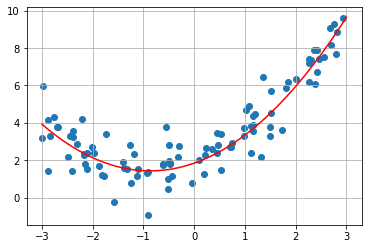

In [43]:
X_new = np.linspace(start=-3, stop=3, num=100).reshape(100, 1)  # 컬럼 벡터
X_new_poly = poly_features.transform(X_new)
y_new = sgd_reg.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-')

plt.scatter(X, y)

plt.grid()

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

(-3.3, 3.3, -1.0, 10.0)

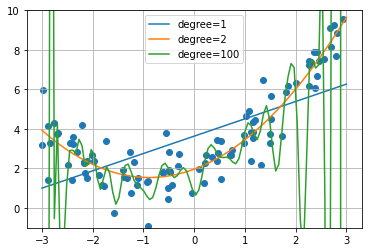

In [55]:
# 선형 회귀, 2차 다항 회귀, 100차 다항 회귀 결과 비교
plt.scatter(X, y)

for degree in [1, 2, 100]:  # degree=1: 선형 회귀.
    # 1) 다차항 파생 변수 추가
    poly_feature = PolynomialFeatures(degree, include_bias=False)
    # 2) 파생 변수들을 포함한 모든 특성들을 같은 스케일로 변환
    std_scaler = StandardScaler()  # 다항 회귀에서 차수가 커질수록 특성 스케일링을 하는 게 좋음.
    # 3) 선형 회귀 또는 SGD 학습
    sgd_reg = LinearRegression()
    # 모델 생성
    pipe = Pipeline(steps=[
                           ('poly_feature', poly_feature),
                           ('scaler', std_scaler),
                           ('model', sgd_reg)
    ])
    # 모델 훈련
    pipe.fit(X, y)
    # 훈련된 모델로 테스트 세을 예측
    y_new = pipe.predict(X_new)
    plt.plot(X_new, y_new, label=f'degree={degree}')

plt.legend()
plt.grid()
plt.axis(ymin=-1, ymax=10)

# 훈련 셋(X)의 많은 점들은 100차 다항 회귀 곡선 위에 놓여 있음.
# -> 100차 다항 회귀 곡선은 훈련 셋을 잘 설명함.
# -> 훈련되지 않은 테스트 셋(X_new)의 예측값은 오차가 매우 클 수 있음.
# -> Overfitting(과적합, 과대적합)

규제(Regulariztion), 페널티(Penalty):
* 모델을 훈련시킬 때, 비용 함수(cost function)/손실 함수(loss function)에 항을 추가해서 일부러 에러를 키우는 방법.
* 훈련 셋에 대해서는 에러가 커지기 때문에 과적합(overfitting)을 줄일 수 있음.
* Ridge 규제(l2 페널티): `비용함수 = MSE + alpha * l2-norm`
* l2 페널티의 크기가 커지면 모든 계수들(b1, b2, ...)을 0에 가깝게 만드는 효과가 있음.
* Lasso 규제(l1 페널티): `비용함수 = MSE + alpha * l1-norm`
* l1 페널티의 크기가 커지면 중요하지 않은 계수들만 0에 가깝게 만드는 효과가 있음.
* Elastic Net: `Ridge(l2) + Lasso(l1)`

In [56]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor

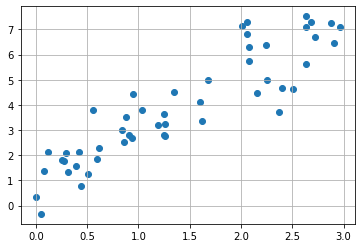

In [57]:
np.random.seed(1)
m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 2 * X + np.random.randn(m, 1)

plt.scatter(X, y)
plt.grid()

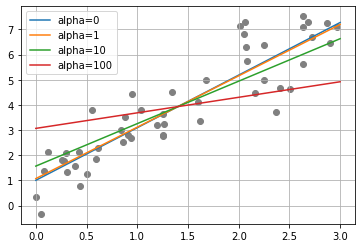

In [58]:
X_new = np.linspace(0, 3, 100).reshape((100, 1))  # 테스트 셋

# Ridge(l2) 규제를 적용한 선형 회귀: alpha(0, 1, 10, 100)
for alpha in [0, 1, 10, 100]:
    model = Ridge(alpha)
    model.fit(X, y)  # 훈련 셋으로 모델 훈련(y = b0 + b1 * x)
    y_new = model.predict(X_new)  # 훈련된 모델을 사용해서 테스트 셋의 예측값을 찾음.
    plt.plot(X_new, y_new, label=f'alpha={alpha}')

plt.scatter(X, y, color='gray')
plt.legend()
plt.grid()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.91387036156907, tolerance: 0.02242278468446272
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.183063936194333, tolerance: 0.02242278468446272
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06365371267323638, tolerance: 0.02242278468446272
  positive)


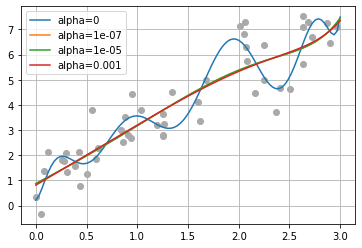

In [59]:
# Lasso(l1 penalty) 규제를 사용한 선형 회귀
for alpha in [0, 1e-7, 1e-5,1e-3]:
    poly_feature = PolynomialFeatures(degree=10)
    std_scaler = StandardScaler()
    if alpha == 0:  # 문서에서 alpha == 0인 경우는 Lasso 대신 L.R.을 사용하라고 되어 있음.
        model = LinearRegression()
    else:
        model = Lasso(alpha)
    pipe = Pipeline(steps=[
                           ('poly', poly_feature),
                           ('scaler', std_scaler),
                           ('model', model)
    ])  # 모델 생성
    pipe.fit(X, y)  # 모델 훈련
    y_new = pipe.predict(X_new)  # 테스트 셋의 예측값
    plt.plot(X_new, y_new, label=f'alpha={alpha}')

plt.scatter(X, y, color='darkgray')
plt.legend()
plt.grid()

In [ ]:
SGDRegressor(penalty='', alpha=)